In [1]:
from __future__ import division
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline
#import mpld3
#from mpld3 import plugins
#mpld3.enable_notebook()

In [2]:
f13 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Fall 2013')
s14 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Spring 2014')
f14 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Fall 2014')
s15 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Spring 2015')

In [3]:
def first(x): 
    return x.min()

def getclean(df):
    df = df.copy()
    df['Credit Hours'].fillna(0,inplace=True)
    df['Primary Instructor Last Name'].fillna('Unknown',inplace=True)
    df['Divs Desc'].fillna('Unknown',inplace=True)
    grp = df.groupby('Course Title', as_index=False)
    agd = grp.aggregate({
        #'Course Title': first,
              'Divs Desc': first,
              'Subj Desc': first,
              'Actual Enrollment': np.sum,
              'Census Enrollment1': np.sum,
              'Primary Instructor Last Name': first,
              'Credit Hours': first,
              'Credit Hours Low': first,
              'Ptrm Desc': first,
              'Delta': np.sum})
    df = agd.sort('Delta')
    df = df[df['Census Enrollment1'] > 0] # Do this last, so newly added sections get counted    
    return df

f13 = getclean(f13)
s14 = getclean(s14)
f14 = getclean(f14)
s15 = getclean(s15)

for (df,desc) in zip((f13,s14,f14,s15),('Fall 2013','Spring 2014','Fall 2014','Spring 2015')):
    print "Working with",desc
    print "Number of NaN rows", len(df[df.isnull().any(axis=1)])
    print df['Delta'].describe()
    print

Working with Fall 2013
Number of NaN rows 0
count    243.000000
mean      -0.860082
std        1.745411
min       -8.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: Delta, dtype: float64

Working with Spring 2014
Number of NaN rows 0
count    264.000000
mean      -0.871212
std        2.282035
min      -23.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: Delta, dtype: float64

Working with Fall 2014
Number of NaN rows 0
count    267.000000
mean      -0.790262
std        2.007743
min      -14.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: Delta, dtype: float64

Working with Spring 2015
Number of NaN rows 0
count    279.000000
mean      -0.992832
std        1.717437
min      -13.000000
25%       -1.500000
50%        0.000000
75%        0.000000
max        2.000000
Name: Delta, dtype: float64



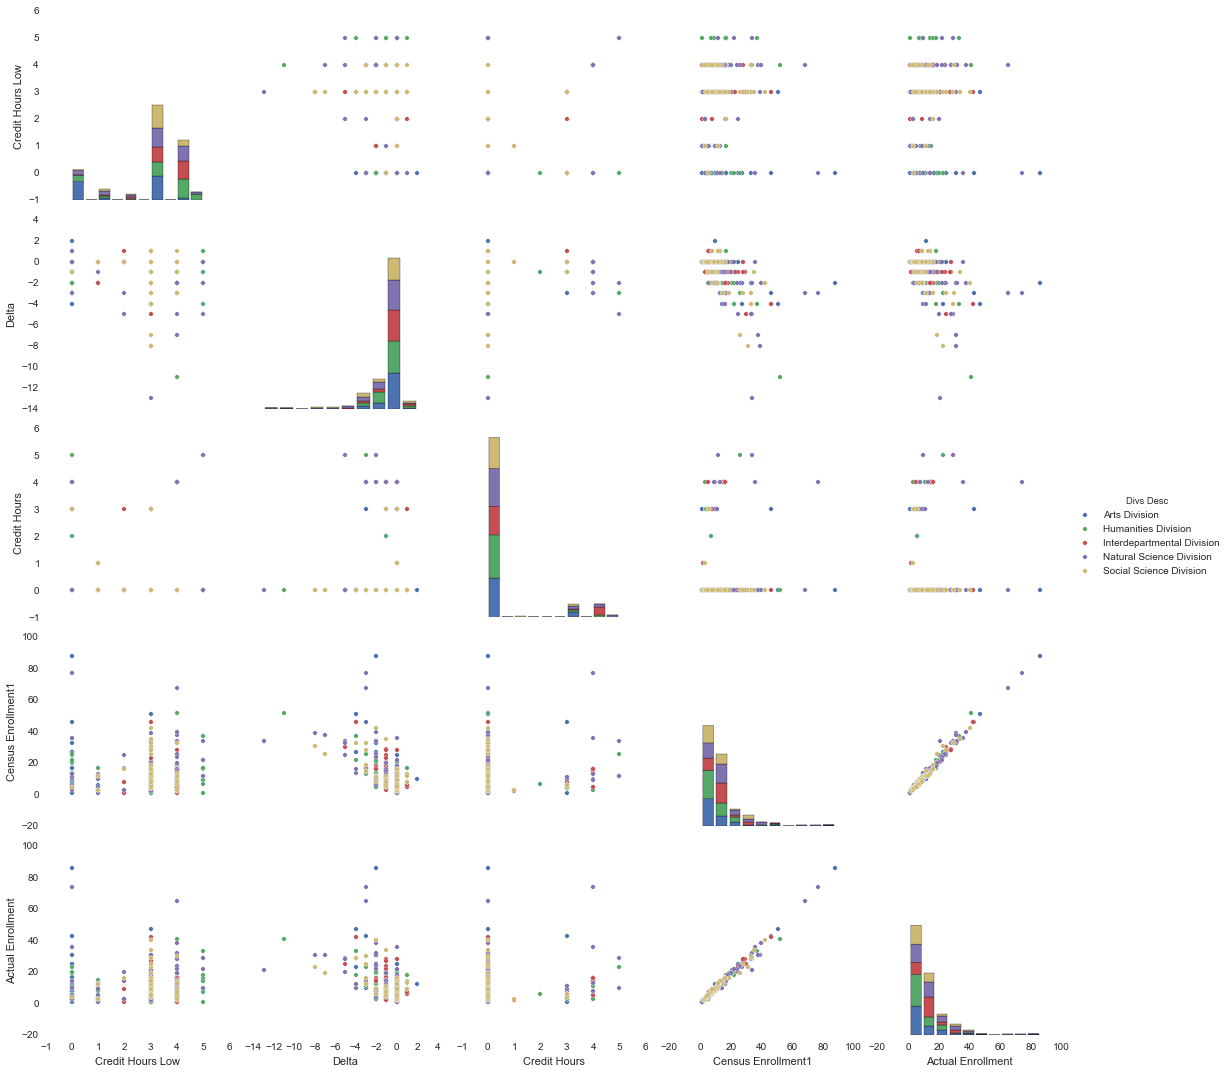

In [4]:
sns.pairplot(df, hue="Divs Desc", size=3)

In [6]:
sns.pairplot

<function seaborn.linearmodels.pairplot>